In [14]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Locate Data to be used and Merge
pet_csv = "../Resources/adoption_data.csv"
state_csv = "../Resources/2020_population_data.csv"
adoption_data_df = pd.read_csv(pet_csv)
state_data_df = pd.read_csv(state_csv)

#pet_data_df = pd.merge(adoption_data_df, state_data_df, on=["State"])
pet_data_df = pd.read_csv("../Resources/shelter_data_complete.csv")

In [16]:
def region_from_state(state):
    if state in ["ME", "NH", "VT", "CT", "RI", "MA"]:
        region = "New England"
    elif state in ["MD", "PA", "NY", "NJ", "DE", "DC"]:
        region = "Mideast"
    elif state in ["WI", "IL", "MI", "IN", "OH"]:
        region = "Great Lakes"
    elif state in ["ND", "SD", "NE", "KS", "MN", "IA", "MO"]:
        region = "Plains" 
    elif state in ["AR", "LA", "MS", "TN", "KY", "WV", "VA", "NC", "SC", "GA", "FL", "AL"]:
        region = "Southeast"   
    elif state in ["AZ", "NM", "TX", "OK"]:
        region = "Southwest "    
    elif state in ["ID", "UT", "MT", "WY", "CO"]:
        region = "Rocky Mountain "
    elif state in ["CA", "NV", "OR", "WA"]:
        region = "Far West"
    elif state in ["HI", "AK", "PR"]:
        region = "Non-Continental"
    else:
        region = "NOT FOUND"
    return region

pet_data_df["Region"] = pet_data_df["State"].map(region_from_state)
pet_data_df.head(10)


,State,Year,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,...,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine,Population,Region
0,AL,2019,5006,7199,811,16,467,7582,140,744,...,2895,15,5927,1,310,27,111,3094,5024279,Southeast
1,AL,2020,3495,6803,527,19,525,6816,140,747,...,2303,16,6483,5,253,21,63,2054,5024279,Southeast
2,AL,2021,3282,7481,683,7,995,7181,147,1180,...,2584,0,6118,90,260,13,37,2099,5024279,Southeast
3,AK,2019,850,1786,32,67,68,1689,353,0,...,0,0,0,0,0,0,0,0,733391,Non-Continental
4,AK,2020,800,1404,61,51,68,1755,331,0,...,0,0,0,0,0,0,0,0,733391,Non-Continental
5,AK,2021,743,1522,85,37,70,1886,289,1,...,0,0,0,0,0,0,0,0,733391,Non-Continental
6,AZ,2019,11933,14168,1367,555,2042,20098,508,443,...,11501,578,8344,391,590,78,1677,3044,7151502,Southwest
7,AZ,2020,8410,11719,1446,507,1564,16664,447,188,...,7283,0,6043,703,374,19,1636,2031,7151502,Southwest
8,AZ,2021,9823,14545,1192,103,1681,17735,480,71,...,8784,0,5392,757,493,24,590,2346,7151502,Southwest
9,AR,2019,1131,3618,158,3,259,3630,557,48,...,3367,0,1765,472,62,1,4,464,3011524,Southeast


In [17]:
pet_data_df["total_feline_intake"] = pet_data_df['Intake - Stray At Large Total-Feline'] + pet_data_df['Intake - Transferred In Total-Feline'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Feline'] + pet_data_df['Intakes - Other Intakes Total-Feline']
pet_data_df["total_feline_live_outcome"] = pet_data_df['Live Outcome - Adoption Total-Feline'] + pet_data_df['Live Outcome - Returned To Owner Total-Feline'] + pet_data_df['Live Outcome - Returned To Field Total-Feline'] + pet_data_df['Live Outcome - Transferred Out Total-Feline'] + pet_data_df['Live outcome - Other Live Outcome Total-Feline']
pet_data_df["total_feline_other_outcome"] = pet_data_df['Other Outcome - Died In Care Total-Feline'] + pet_data_df['Other Outcome - Lost In Care Total-Feline'] + pet_data_df['Other Outcome - Owner Intended Euthanasia Total-Feline'] + pet_data_df['Other Outcome - Shelter Euthanasia Total-Feline']
pet_data_df["total_canine_intake"] = pet_data_df['Intake - Stray At Large Total-Canine'] + pet_data_df['Intake - Transferred In Total-Canine'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Canine'] + pet_data_df['Intakes - Other Intakes Total-Canine']
pet_data_df["total_canine_live_outcome"] = pet_data_df['Live Outcome - Adoption Total-Canine'] + pet_data_df['Live Outcome - Returned To Owner Total-Canine'] + pet_data_df['Live Outcome - Returned To Field Total-Canine'] + pet_data_df['Live Outcome - Transferred Out Total-Canine'] + pet_data_df['Live outcome - Other Live Outcome Total-Canine']
pet_data_df["total_canine_other_outcome"] = pet_data_df['Other Outcome - Died In Care Total-Canine'] + pet_data_df['Other Outcome - Lost In Care Total-Canine'] + pet_data_df['Other Outcome - Owner Intended Euthanasia Total-Canine'] + pet_data_df['Other Outcome - Shelter Euthanasia Total-Canine']

In [18]:
cat_data_regional = pet_data_df[["Year" , "Region", "State"]].copy()

cat_data_regional["Total Feline Intake"] = pet_data_df['Intake - Stray At Large Total-Feline'] + pet_data_df['Intake - Transferred In Total-Feline'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Feline'] + pet_data_df['Intakes - Other Intakes Total-Feline']
cat_data_regional["Total Feline Outcomes"] = pet_data_df["total_feline_live_outcome"] + pet_data_df["total_feline_other_outcome"]

dog_data_regional = pet_data_df[["Year" , "Region", "State"]].copy()

dog_data_regional["Total Canine Outcomes"] = pet_data_df["total_canine_live_outcome"] + pet_data_df["total_canine_other_outcome"]
dog_data_regional["Total Canine Intake"] = pet_data_df['Intake - Stray At Large Total-Canine'] + pet_data_df['Intake - Transferred In Total-Canine'] + pet_data_df['Intake - Owner Intended Euthanasia Total-Canine'] + pet_data_df['Intakes - Other Intakes Total-Canine']


<AxesSubplot:title={'center':'Annual Regional Adoptions'}, xlabel='Regions', ylabel='Number of Animals'>

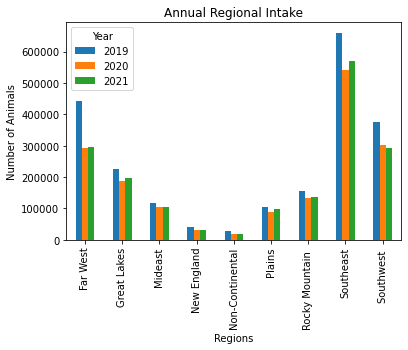

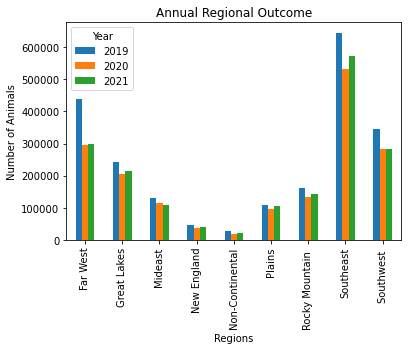

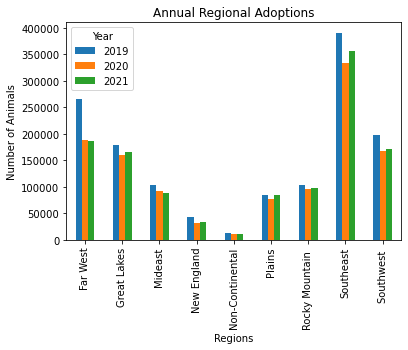

In [28]:
combined_df = pet_data_df[["Year" , "Region"]].copy()

combined_df["Intake"] = cat_data_regional["Total Feline Intake"] + dog_data_regional["Total Canine Outcomes"]

combined_df['Outcome'] = cat_data_regional["Total Feline Outcomes"] + dog_data_regional["Total Canine Intake"]

combined_df["Adoptions"] = pet_data_df['Live Outcome - Adoption Total-Canine'] + pet_data_df['Live Outcome - Adoption Total-Feline']

total_df = combined_df.groupby(["Year","Region"]).sum()

intake_pivot = pd.pivot_table(total_df, index="Region", columns="Year", values="Intake")
intake_pivot.plot(
    kind="bar", 
    xlabel="Regions", 
    ylabel="Number of Animals", 
    title="Annual Regional Intake"
)

outcome_pivot = pd.pivot_table(total_df, index="Region", columns="Year", values="Outcome")
outcome_pivot.plot(
    kind="bar", 
    xlabel="Regions", 
    ylabel="Number of Animals", 
    title="Annual Regional Outcome"
)

adoption_pivot = pd.pivot_table(total_df, index="Region", columns="Year", values="Adoptions")
adoption_pivot.plot(
    kind="bar", 
    xlabel="Regions", 
    ylabel="Number of Animals", 
    title="Annual Regional Adoptions"
)

    

In [31]:
total_df

Intake  Outcome  Adoptions
Year Region                                     
2019 Far West         443480   437755     266436
     Great Lakes      225044   242692     179042
     Mideast          118738   129530     103534
     New England       40238    47332      42469
     Non-Continental   28120    27428      12363
     Plains           103487   107400      84064
     Rocky Mountain   156987   160726     104000
     Southeast        660071   645206     390759
     Southwest        374131   346147     198231
2020 Far West         294074   295307     188295
     Great Lakes      186764   204406     160417
     Mideast          104138   113321      92748
     New England       31272    36340      32605
     Non-Continental   19254    19508      11276
     Plains            89037    95789      77711
     Rocky Mountain   131836   133980      95005
     Southeast        539803   531794     333650
     Southwest        302632   282479     167766
2021 Far West         295024   297515     185916
     Great Lakes      198305   213890     166007
     Mideast          103459   109260      88136
     New England       32637    38392      33528
     Non-Continental   19968    20566      11592
     Plains            98495   104912      84104
     Rocky Mountain   136814   141450      97643
     Southeast        570941   571146     356593
     Southwest        293051   283186     171325